# Calculation of Kalman filter steps

## Calculation of 2 Kalman filter steps

I first show all the calculations I did and then I
will present the full requested table.

From the motion equation:

$$x_k = x_{k-1} + \epsilon_t \quad \textrm{with} \quad \epsilon_t=\mathcal{N}(0,2)$$

we can derive $r^2=2$.

Additionally, from the measurement equation:

$$z_k = x_{k} + \delta_t \quad \textrm{with} \quad \delta_t=\mathcal{N}(0,3)$$

we can derive $q^2=3$.

In addition, we were given that the initial belief is:

$$\mu_0 = 2, \quad \Sigma_0=5$$

Now we can move to calculate each step of the Kalman filter steps. For each
iteration we calculated the prediction, Kalman gain and measurement update.

> **Iteration 1 ($k=1$)** <br>
>
> _Prediction:_
>
> $$\bar{\mu}_1=\mu_0=2, \quad \bar{\Sigma}_1=\Sigma_0 + r^2=7$$
>
> _Kalman Gain:_
>
> $$K_1 = \frac{\bar{\Sigma}_1}{\bar{\Sigma}_1 + q^2} = 0.7$$
>
> _Measurement Update:_
>
> $$\mu_1 = \bar{\mu}_1 + K_1(z_1 - \bar{\mu}_1) = 1.3$$
>
> $$\Sigma_1 = (1 - K_1)\bar{\Sigma}_1 = 2.1$$

> **Iteration 2 ($k=2$)** <br>
>
> _Prediction:_
>
> $$\bar{\mu}_2 = \mu_1 = 1.3, \quad \bar{\Sigma}_2 = \Sigma_1 + r^2 = 4.1$$
>
> _Kalman Gain:_
>
> $$K_2 = \frac{\bar{\Sigma}_2}{\bar{\Sigma}_2 + q^2} = 0.5775$$
>
> _Measurement Update:_
>
> $$\mu_2 = \bar{\mu}_2 + K_2(z_2 - \bar{\mu}_2) = 1.7042$$
>
> $$\Sigma_2 = (1 - K_2)\bar{\Sigma}_2 = 1.7322$$

And in conclusion the full table:

| k   | $\bar{\mu}_k$ | $\bar{\Sigma}_k$  | $K_k$ | $\mu_k$ | $\Sigma_k$ |
| :-: |:-------------:| :----------------:| :------:| :-----: | :--------: |
| 1   | 2             | 7                 | 0.7     | 1.3     | 2.1        |
| 2   | 1.3           | 4.1               | 0.5775  | 1.7042  | 1.7322   |

## Parameters Explanation

* $\bar{\mu}_k$: The prediction of the position in step $k$. The predicted position is done with the motion equations.

* $\bar{\Sigma}_k$: The prediction uncertainty of step $k$. Calculated by the
 uncertainty of the previous step plus the noise of motion.

* $K_k$: Kalman gain of step $k$. The Kalman gain calculates by the uncertainty of
 the estimation divided by the sum of uncertainty of estimation and measurement.
 This mean the Kalman gain is a number between 0 to 1. When the measurement uncertainty is very large and the estimate uncertainty is very small, the Kalman Gain is close to zero. Hence we give a big weight to the estimate and a small weight to the measurement.
 On the other side, when the measurement uncertainty is very small and the estimate uncertainty is very large, the Kalman Gain is close to one. Hence we give a small weight to the estimate and a big weight to the measurement.

* $\mu_k$: The updated prediction of the location in step $k$. The $\mu_k$ combining the estimation with the measurement using the Kalman gain.

* $\Sigma_k$: The updated uncertainty in step $k$ after using the Kalman gain in order to decrease the noise.

## Steady-State Covariance

Now we compute $\Sigma_{\infty}$ in our problem conditions:

$$\Sigma_k = (1 - K_k) \bar{\Sigma}_k = (1 - \frac{\bar{\Sigma}_k}{\bar{\Sigma}_k + q^2})\bar{\Sigma}_k  = \frac{q^2\bar{\Sigma}_k}{\bar{\Sigma}_k + q^2}$$

We know $\bar{\Sigma}_k = \Sigma_{k-1} +r^2$ but when $k\to\infty$ we can assume $\Sigma_k = \Sigma_{k-1}$.
Which mean $\bar{\Sigma}_k = \Sigma_k + r^2$. Now:

$$\Sigma_k = \frac{q^2(\Sigma_k + r^2)}{\Sigma_k + r^2 + q^2}$$ <br>
$$\Downarrow$$ <br>
$${\Sigma_k}^2 + \Sigma_k r^2 - q^2 r^2 = 0$$

Using the given $r^2=2$ and $q^2=3$ we got ${\Sigma_k}^2 + 2\Sigma_k - 6 = 0$.
We found:

$$\Sigma_k = -3.645; \quad \Sigma_k = 1.645$$

Since $\Sigma_k > 0$ we got:

$$\Sigma_{\infty} = 1.645$$


# Localization of a mobile robot using a Kalman Filter

## Matrices & Functions for Kalman Filter Implementation

From looking at the deterministic discrete dynamics of the robot it seen that the
dynamics are non-linear. The Extended Kalman Filter (EKF) solving the non-linearity issue.
So, instead of $A$ and $B$ matrices in the linear case it was needed
to find $g(u_t, x_{t-1})$, where:

$$ x_t = g(u_t, x_{t-1}) + \epsilon_t, \quad \epsilon_t=\mathcal{N}(0, R_t)$$

The state vector $x_t$ defined as $(x \quad y \quad \theta)^T$ and the control
vector $u_t$ defined as $(v_t \quad \omega_t)^T$. Using the given dynamic equations we got:

$$g(u_t, x_{t-1}) =
\begin{pmatrix}
x_t + v_t cos(\theta_t + \omega_t \Delta t) \\
y_t + v_t sin(\theta_t + \omega_t \Delta t) \\
\theta_t + \omega \Delta t
\end{pmatrix}$$

In order to find $x_t$ the EKF algorithm make use of local linearization. So the follows
$G_t$ matrix was needed:

$$G_t = \frac{\partial g(u_t, x_{t-1})}{\partial x_{t-1}}\mid_{x_{t-1} = \mu_{t-1}}$$

Using the above-mentioned definition we got:

$$G_t =
\begin{pmatrix}
1 & 0 & -v_t sin(\theta_t + \omega_t \Delta t) \\
0 & 1 & v_t cos(\theta_t + \omega_t \Delta t) \\
0 & 0 & 1
\end{pmatrix}$$

The same procedure was needed for the measurement update. First we needed non-linear function
$h(x_t)$ so that:

$$z_t = h(x_t) + \delta_t, \quad \delta_t=\mathcal{N}(0, Q_t)$$

As required in the exercise the measurements
were distance and direction to a landmark with fixed coordinates $m_x$ and $m_y$.
So, the $h(x_t)$ function which map from given state $x_t$ to measurement $z_t$ is:

$$h(x_t, m) =
\begin{pmatrix}
\sqrt{(m_x - x)^2 + (m_y - y)^2}\\
\operatorname{atan2}(m_y - y, m_x - x) - \theta \\
\end{pmatrix}$$

where $\operatorname{atan2}$ function defined as:

$$\operatorname{atan2}(y,x) =
\begin{cases}
\arctan\left(\frac{y}{x}\right) &\text{if } x > 0, \\
\frac{\pi}{2} - \arctan\left(\frac{x}{y}\right) &\text{if } y > 0, \\
-\frac{\pi}{2} - \arctan\left(\frac{x}{y}\right) &\text{if } y < 0, \\
\arctan\left(\frac{y}{x}\right) \pm \pi &\text{if } x < 0, \\
\text{undefined} &\text{if } x = 0 \text{ and } y = 0.
\end{cases}$$

The $H_t$ matrix was calculated as:

$$H_t = \frac{\partial h(x_t)}{\partial x_t}\mid_{x_t = \mu_t}$$

,hence:

$$H_t =
\begin{pmatrix}
\frac{m_x - x}{\sqrt{q}} & \frac{y - m_y}{\sqrt{q}} & 0 \\
\frac{m_y - y}{q} & \frac{m_x - x}{q} & -1
\end{pmatrix}$$

where $q=(m_x - x)^2 + (m_y - y)^2$.

Now we only need the matrices $R_t$ and $Q_t$ in order to have all the
matrices and function EKF requires. The variance of the sensor's noise
was given in the exercise, so the covariance matrix of the measurement
noise is:

$$Q_t =
\begin{pmatrix}
\sigma_r^2 & 0\\
0 & \sigma_\phi^2 \\
\end{pmatrix}$$

where $r$ and $phi$ are the distance and direction to the landmark respectively.
$Q_t$ was construct while assuming $r$ and $\phi$ are independent measurements.

For constructing $R_t$ matrix I used the following equation:

$$R_t = V_t M_t V_t^T$$

where $V_t=\frac{\partial F(x_t,u_t)}{\partial u_t}$, $F$ is the dynamics
and $M_t$ is the covariance matrix of the control. Assuming the controls
$v$ and $\omega$ are independent we got:

$$M_t =
\begin{pmatrix}
\sigma_v^2 & 0\\
0 & \sigma_\omega^2 \\
\end{pmatrix}$$

Derivation of the dynamics by the control got us the following $V_t$:

$$V_t =
\begin{pmatrix}
cos(\theta_t + \omega_t \Delta t) & -v_t sin(\theta_t + \omega_t \Delta t) \Delta t \\
sin(\theta_t + \omega_t \Delta t) & v_t cos(\theta_t + \omega_t \Delta t) \Delta t \\
0 & \Delta t
\end{pmatrix}$$

Now we got all the required matrices in order to compute $R_t$ matrix.
The calculation of the matrix was in the relevant part in the code.

By using the described functions $g(u_t, x_{t-1})$ and $h(x_t)$
next to the matrices $G_t$, $H_t$, $R_t$ and $Q_t$ we got everything
requires in order to implement EKF algorithm.

## Measurements & Ground-Truth Figures

First I loaded the data as dictionary with three keys: `measurements`, `controls` and
`ground_truth`. The value of each key is the corresponded data frame. In order to make
the report more readable I only call functions which plot the required figures. All these
function can be found in `figures.py`.

In [1]:
from main import load_data, data_params
from figures import *

# Load the data
data = load_data(data_params['paths'], data_params['columns'])

# Plot 'Figure 1'
figure_1(ground_truth=data['ground_truth'], estimation=None)

<Figure size 640x480 with 3 Axes>

All the graphs share the same x-axis (time) and we can see the ground-truth of the robot splitted
into x, y and $\theta$.

And now for the robot XY motion:

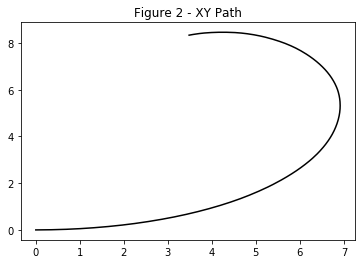

In [2]:
# Plot 'Figure 2'
figure_2(ground_truth=data['ground_truth'],
         estimation=None,
         measurements=None)

Great move of the robot!